<a href="https://colab.research.google.com/github/Ankita8876/AnkitaHazarika/blob/master/Final_Project_of_SentimentAnalysis_using_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import os, json
import torch
import matplotlib.pyplot as plt
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
import torch

if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
#Loading the both train and test dataset model , (Taking both the datasets in the ratio 7:3 for suitable graph distribution)
df = pd.read_csv('/content/final_train_model.csv') # a sample dataset for training the model
test = pd.read_csv('/content/final_vaccine_model.csv') # the main dataset for testing the model

In [ ]:
#Data-exploration of train dataset 
#all tweets
df.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


In [ ]:
#dataexploration of train dataset
#positive tweets
df[df['new_sentiment']=="positive"].head(50)


,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
40,1956977084,happiness,ktierson,mmm much better day... so far! it`s still quite early. last day of #uds,mmm much better day... so far! it's still quite early. last day of #uds,f10e631e2d,positive,much better day..
41,1956977187,fun,diNGUYEN31,<3 your gonna be the first twitter ;) cause your amazing lol. come to canada would do anything to see you perform,@DavidArchie &lt;3 your gonna be the first twitter ;) cause your amazing lol. come to canada would do anything to see you perform,3aa450d12d,positive,NaN
46,1956978668,worry,bryancheung,"Ahh. ... Well, I was hoping that I could learn some stuff on the way. ... Why not you and I work on separate things but also","@onscrn Ahh. ... Well, I was hoping that I could learn some stuff on the way. ... Why not you and I work on separate things but also",09162e0abc,positive,s hoping
50,1956979894,neutral,lookitsholly,Chocolate milk is so much better through a straw. I lack said straw,Chocolate milk is so much better through a straw. I lack said straw,323aad8e73,positive,Chocolate milk is so much better through a straw.
56,1956981427,enthusiasm,Caillie,"bed...sorta. today was good, sara has strep thought Angelina does to; i shared a water with her B4 they told me, i will prob get it to","bed...sorta. today was good, sara has strep thought Angelina does to; i shared a water with her B4 they told me, i will prob get it to",2ec6fdf18a,positive,"good,"
72,1956984205,neutral,chicabajoelsol,Brothers Bloom won`t be opening this weekend in El Paso. I`ll just buy Brick and enjoy that until I can watch Brothers Bloom.,Brothers Bloom won't be opening this weekend in El Paso. I'll just buy Brick and enjoy that until I can watch Brothers Bloom.,e4d45896f3,positive,enjoy
90,1956988145,neutral,padfootly,what`s going on sweetheart?,@lepetitagneau what's going on sweetheart?,ee9d0cab1f,positive,what`s going on sweetheart?
94,1956989093,love,Angela_Grace,correct! I ADORE him. I just plucked him up and put him under my arm cuz he was cryin. All better now! Hahaha,@RobertF3 correct! I ADORE him. I just plucked him up and put him under my arm cuz he was cryin. All better now! Hahaha,df62bc7a7a,positive,ADORE
101,1956990288,hate,MissPassion,You win ... SIGH Rakeem,@mrgenius23 You win ... SIGH Rakeem,d5ebd5f984,positive,win


In [ ]:
#neutral tweets
df [df['new_sentiment']=="neutral"].head(50)

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."
10,1956969456,neutral,feinyheiny,cant fall asleep,cant fall asleep,246a76f214,neutral,cant fall asleep
14,1956970860,surprise,okiepeanut93,Got the news,Got the news,f023803c3e,neutral,Got the news
16,1956971170,love,poppygallico,agreed,@annarosekerr agreed,768801365c,neutral,agreed
20,1956971981,worry,andreagauster,oh too bad! I hope it gets better. I`ve been having sleep issues lately too,@raaaaaaek oh too bad! I hope it gets better. I've been having sleep issues lately too,ce2c823958,neutral,oh too bad! I hope it gets better. I`ve been having sleep issues lately too
21,1956972097,fun,schiz0phren1c,"Wondering why I`m awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh **** it,not secret anymore","Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore",b7bd030e8e,neutral,"Wondering why I`m awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh **** it,not secret anymore"
23,1956972270,worry,sweet8181,I ate Something I don`t know what it is... Why do I keep Telling things about food,I ate Something I don't know what it is... Why do I keep Telling things about food,327f378bd9,neutral,NaN
33,1956975876,neutral,jubaldo,feels strong contractions but wants to go out. http://plurk.com/p/wxidk,feels strong contractions but wants to go out. http://plurk.com/p/wxidk,b622ed93ab,neutral,feels strong contractions but wants to go out. http://plurk.com/p/wxidk
34,1956975927,neutral,mikhaelaela,SoCal! stoked. or maybe not.. tomorrow,SoCal! stoked. or maybe not.. tomorrow,7209a17dde,neutral,SoCal! stoked. or maybe not.. tomorrow
37,1956976371,worry,babyxj,I need skott right now,I need skott right now,c0341849e4,neutral,I need skott right now


In [ ]:
df[df['new_sentiment']=="negative"].head(50)

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
5,1956968477,worry,xxxPEACHESxxx,Re-pinging : why didn`t you go to prom? BC my bf didn`t like my friends,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,a610d6b25b,negative,didn`t like my
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,Hmmm. http://www.djhero.com/ is down,2dfbe0b7fb,negative,NaN
8,1956969035,sadness,nic0lepaula,Charlene my love. I miss you,@charviray Charlene my love. I miss you,cc22eca4c5,negative,Charlene my love. I miss you
9,1956969172,sadness,Ingenue_Em,I`m sorry at least it`s Friday?,@kelcouch I'm sorry at least it's Friday?,6d846d7d50,negative,NaN
11,1956969531,worry,dudeitsmanda,Choked on her retainers,Choked on her retainers,133109505a,negative,Choked on her retainers
12,1956970047,sadness,Danied32,Ugh! I have to beat this stupid song to get to the next rude!,Ugh! I have to beat this stupid song to get to the next rude!,f9592a798a,negative,Ugh!
13,1956970424,sadness,Samm_xo,if u watch the hills in london u will realise what tourture it is because were weeks and weeks late i just watch itonlinelol,@BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late i just watch itonlinelol,d60b07133a,negative,realise what tourture
17,1956971206,sadness,brokenangel1982,So sleepy again and it`s not even that late. I fail once again.,So sleepy again and it's not even that late. I fail once again.,7d41c25c44,negative,fail


In [ ]:
df.shape

(14024, 8)

In [ ]:
test.shape

(6125, 16)

In [ ]:
#label distribution of train dataset
df["new_sentiment"].value_counts()


negative    5317
neutral     4361
positive    1289
Name: new_sentiment, dtype: int64

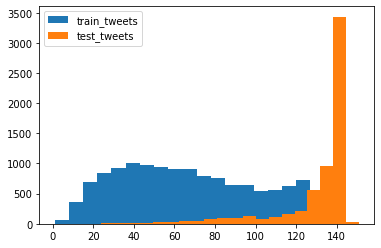

In [ ]:
#checking the distribution of the length of the tweets of both train and test datasets
length_train = df['text'].str.len()
length_test = test['text'].str.len()
plt.hist(length_train, bins=20, label = "train_tweets")
plt.hist(length_test, bins=20, label ="test_tweets")
plt.legend()
plt.show()

In [ ]:
#we select the useful columns from the dataset and make a new dataframe for training purpose
train= pd.DataFrame()
train['text']= df['text']
train['Sentiment']= df['new_sentiment']

In [ ]:
train=train.dropna()

In [ ]:
train.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 7.3 MB/s 
     |████████████████████████████████| 636 kB 69.6 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 895 kB 71.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
train['Sentiment'] = train['Sentiment'].replace(['negative','neutral','positive'],[0,1,2])

In [ ]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
print(tokenizer.tokenize("Hello. This is a sample statement for visualisation purposes"))

['hello', '.', 'this', 'is', 'a', 'sample', 'statement', 'for', 'visual', '##isation', 'purposes']


In [ ]:
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize("Hello. This is a sample statement for visualisation purposes")))

[7592, 1012, 2023, 2003, 1037, 7099, 4861, 2005, 5107, 6648, 5682]


In [ ]:
max_len = 0


for tweet in train['text']:
    
    # The following code is used to clean the tweets by removing URLs, accounts, quotation marks,etc
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    tweet = url_pattern.sub(r'', tweet)
    tweet = re.sub('\S*@\S*\s?', '', tweet)
    tweet = re.sub('\s+', ' ', tweet)
    tweet = re.sub("\'", "", tweet)

    input_ids = tokenizer.encode(tweet, add_special_tokens=True)

    max_len = max(max_len, len(input_ids))        #maximum length of input ids

print('Max sequence length: ', max_len)

Max sequence length:  95


In [ ]:
input_ids = []
attention_masks = []

for sent in train['text']:
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 110,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
     
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train['Sentiment'].tolist())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
#datasets and dataloaders 
#(Creating a data loader so that our data set is sliced into batches and made into the right format needed by our BERT model. )
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)  #storing the input ids,masks and labels in dataset

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])  #90-10 train-val split

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


batch_size = 32

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset),     #random sampling in training
            batch_size = batch_size 
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset),    #sequential sampling in validation
            batch_size = batch_size 
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig


model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 3,   
    output_attentions = False,
    output_hidden_states = False,
)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#optimizer and scheduler
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8 
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 4


total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    elapsed_rounded = int(round((elapsed)))
    
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
#training model
import random
import numpy as np


seed_val = 42
epochs=1

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.to(device)


training_stats = []

total_t0 = time.time()

for epoch_i in range(0, epochs):
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):
        
        # Printing the progress after every 40 epochs
        if step % 40 == 0 and not step == 0:
            
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            

    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch    40  of    308.    Elapsed: 0:22:22.
  Batch    80  of    308.    Elapsed: 0:44:43.
  Batch   120  of    308.    Elapsed: 1:07:04.
  Batch   160  of    308.    Elapsed: 1:29:24.
  Batch   200  of    308.    Elapsed: 1:51:42.
  Batch   240  of    308.    Elapsed: 2:14:31.
  Batch   280  of    308.    Elapsed: 2:36:46.

  Average training loss: 0.73
  Training epcoh took: 2:52:13

Running Validation...
  Accuracy: 0.77
  Validation Loss: 0.55
  Validation took: 0:06:03

Training complete!
Total training took 2:58:16 (h:mm:ss)


In [ ]:
#testing model
test = pd.read_csv("/content/final_vaccine_model.csv")
test

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",21-09-2009 15:27,834,666,178,False,13-12-2020 16:27,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",10-09-2008 11:28,49165,3933,21853,True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,23-04-2020 17:58,152,580,1473,False,12-12-2020 20:17,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,1.358890e+18,Workout Solutions,"Toronto, Canada and Worldwide","George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World",20-09-2010 17:01,1158,152,1146,False,08-02-2021 21:17,@fordnation Doug Ford and Trudeau will not ask Russia to produce #SputnikV vaccine 91.6% effective against… https://t.co/9HgFzjJtyd,['SputnikV'],Twitter Web App,0,0,False
6121,1.358890e+18,Workout Solutions,"Toronto, Canada and Worldwide","George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World",20-09-2010 17:01,1158,152,1146,False,08-02-2021 21:15,Doug Ford and Trudeau will not ask Russia to produce #SputnikV vaccine 91.6% effective against #COVID19 in Ontario… https://t.co/rrmGqe564u,"['SputnikV', 'COVID19']",Twitter Web App,0,0,False
6122,1.358880e+18,Breaking the News 24/7,"Vienna, Austria","Fastest News Worldwide! ⚡\n\nBe the first to find out the latest news on stocks, financial markets, business, technology & politics.\n\n#BreakingNews",18-02-2016 10:25,12395,1438,392,False,08-02-2021 21:05,🇺🇦 💉 Ukrainian President Volodymyr Zelensky explained that the country decided to reject the #SputnikV COVID-19 vac… https://t.co/2K574Ylhcc,['SputnikV'],Hootsuite Inc.,0,1,False
6123,1.358880e+18,Workout Solutions,"Toronto, Canada and Worldwide","George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World",20-09-2010 17:01,1158,152,1146,False,08-02-2021 21:05,Canada politicizing #COVID19 Doug Ford and Justin Trudeau refuse to call Mr. Putin to produce #SputnikV Russia vacc… https://t.co/9upcMUM

In [ ]:
vax_tweets= test['text']

In [ ]:
#preprocessing the tweets
input_ids = []
attention_masks = []

for sent in vax_tweets:
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    tweet = url_pattern.sub(r'', tweet)
    tweet = re.sub('\S*@\S*\s?', '', tweet)
    tweet = re.sub('\s+', ' ', tweet)
    tweet = re.sub("\'", "", tweet)
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 110,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
     
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
vax_dataset= TensorDataset(input_ids, attention_masks)

batch_size = 32

vax_dataloader = DataLoader(
            vax_dataset,  
            sampler = SequentialSampler(vax_tweets),     #Sequential Sampling
            batch_size = batch_size 
        )

In [ ]:
#predictions
print('Predicting labels for {:,} vaccine tweets...'.format(len(input_ids)))

model.eval()

predictions = []

for batch in vax_dataloader:
 
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids, b_input_mask = batch

  with torch.no_grad():

      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  logits = logits.detach().cpu().numpy()
  
  logits=np.argmax(logits,axis=1)
  for i in range(len(logits)):
    predictions.append(logits[i])
    

print('    DONE.')

Predicting labels for 6,125 vaccine tweets...
    DONE.


In [ ]:
test['Sentiment'] =predictions
test=test.dropna()      

In [ ]:
test.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False,1
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False,1
6,1.337850e+18,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",10-06-2013 17:49,2731,5001,69344,False,12-12-2020 20:06,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,False,0
9,1.337840e+18,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#PAKUSTV #Newyork #Islamabad,12-11-2012 04:18,671,2368,20469,False,12-12-2020 19:30,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False,1
10,1.337840e+18,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (freelance) for some companies that need analysis for their products in Int. Markets \n- Instagram : tamervisits -",17-09-2009 16:45,1302,78,339,False,12-12-2020 19:29,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,1


In [ ]:
#we are dropping the coloumns which are not useful for now.
vax= test.drop(['user_name','user_description','user_created','user_followers','user_friends','user_favourites','is_retweet'],axis=1)

In [ ]:
vax.head(20)

,id,user_location,user_verified,date,text,hashtags,source,retweets,favorites,Sentiment
0,1.340540e+18,"La Crescenta-Montrose, CA",False,20-12-2020 06:06,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,1
2,1.337860e+18,Your Bed,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,1
6,1.337850e+18,"Austria, Ukraine and Kosovo",False,12-12-2020 20:06,"it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP",['vaccination'],Twitter Web App,0,4,0
9,1.337840e+18,Islamabad,False,12-12-2020 19:30,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #Healthcare #GlobalGoals… https://t.co/MksOvBvs5w","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,1
10,1.337840e+18,Turkey-Israel,False,12-12-2020 19:29,"while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !\n-\nThe first U… https://t.co/uQ3A2f7SVP","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,1
15,1.337790e+18,"London, England",True,12-12-2020 16:00,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/2FzQSMnhoY,['vaccine'],Twitter for iPhone,0,1,1
16,1.337790e+18,Global,False,12-12-2020 15:59,UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW,"['YellowFever', 'COVID19', 'ImmunityPassports', 'SARSCoV2', 'PfizerBioNtech', 'Britain', 'December']",Twitter Web App,2,2,1
17,1.337780e+18,Türkiye,True,12-12-2020 15:38,"Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,1
18,1.337780e+18,"Bristol, UK",False,12-12-2020 15:27,.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0,['CovidVaccine'],Twitter for Android,3,3,0
19,1.337780e+18,"Los Angeles, CA",False,12-12-2020 15:10,"The trump administration failed to deliver on vaccine promises, *shocker* #COVIDIOTS #coronavirus #CovidVaccine… https://t.co/hew6eHTUrD","['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,0


In [ ]:
vax['Sentiment']=vax['Sentiment'].map({0:'negative',1:'neutral',2:'positive'})

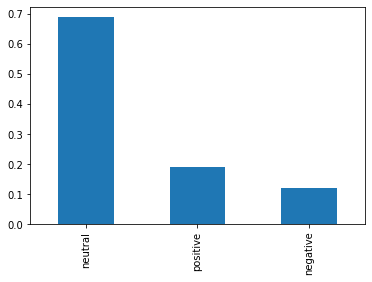

In [ ]:
#sentiment analysis  bar graph
vax['Sentiment'].value_counts(normalize=True).plot.bar()

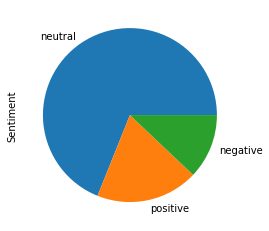

In [ ]:
#sentiment analysis pie graph
vax['Sentiment'].value_counts(normalize=True).plot.pie()


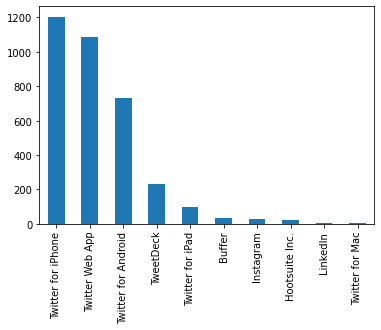

In [ ]:
#graph distribution of tweets from various sources used by the users
vax['source'].value_counts().head(n=10).plot.bar()

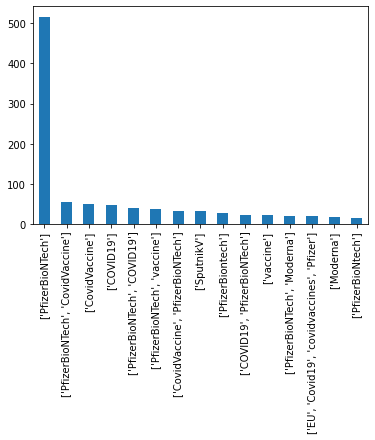

In [ ]:
vax['hashtags'].value_counts().head(n=15).plot.bar()

In [ ]:
#importing plotly express library as px to show high level interface of the bar graph
import plotly.express as px

  Sentiment  tweets
0  negative     423
1   neutral    2418
2  positive     667


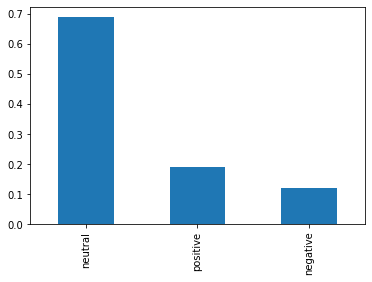

In [ ]:
vax['Sentiment'].value_counts(normalize=True).plot.bar();
timeline = vax.groupby(['Sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()
print(timeline)

fig = px.bar(timeline,
            x='Sentiment', y="tweets", color='Sentiment', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"]
        )
fig.show()

In [ ]:
#percentage of sentiments of the tweets
percentage = vax[vax['Sentiment'] == 'positive']
print(str(percentage.shape[0]/(vax.shape[0])*100) + " % of positive tweets")
percentage = vax[vax['Sentiment'] == 'neutral']
print(str(percentage.shape[0]/(vax.shape[0])*100) + " % of neutral tweets")
percentage = vax[vax['Sentiment'] == 'negative']
print(str(percentage.shape[0]/(vax.shape[0])*100) + " % of negative tweets")


19.01368301026226 % of positive tweets
68.92816419612315 % of neutral tweets
12.058152793614594 % of negative tweets


In [ ]:
vax['date'] = pd.to_datetime(vax['date'], errors='coerce').dt.date

# Get counts of number of tweets by sentiment for each date
timeline = vax.groupby(['date', 'Sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

fig = px.bar(timeline, x='date', y='tweets', color='Sentiment', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"], category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date', 'Sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='Sentiment', category_orders={'Sentiment': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

covaxin = filtered_timeline(vax, ['covaxin'], title='Covaxin')
sinovac = filtered_timeline(vax, ['sinovac'], title='Sinovac')
sinopharm = filtered_timeline(vax, ['sinopharm'], title='Sinopharm')
moderna = filtered_timeline(vax, ['moderna'], title='Moderna')
sputnikv = filtered_timeline(vax, ['sputnik'], title='Sputnik V')
oxford = filtered_timeline(vax, ['oxford', 'astrazeneca'], title='Oxford/AstraZeneca')
pfizer = filtered_timeline(vax, ['pfizer', 'biontech'], title='Pfizer/BioNTech')



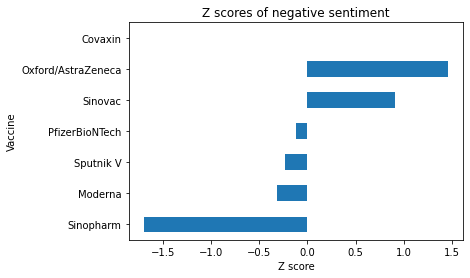

In [ ]:
# Get z scores of sentiment for each vaccine
vax_names = {'Covaxin': covaxin, 'Sputnik V': sputnikv, 'Sinovac': sinovac, 'Sinopharm': sinopharm,
            'Moderna': moderna, 'Oxford/AstraZeneca': oxford, 'PfizerBioNTech': pfizer}
Sentiment_zscores = pd.DataFrame()
for k, v in vax_names.items():
    Senti = v['Sentiment'].value_counts(normalize=True)
    Senti['vaccine'] = k
    Sentiment_zscores = Sentiment_zscores.append(Senti)
for col in ['negative', 'neutral', 'positive']:
    Sentiment_zscores[col+'_zscore'] = (Sentiment_zscores[col] - Sentiment_zscores[col].mean())/Sentiment_zscores[col].std(ddof=0)
Sentiment_zscores.set_index('vaccine', inplace=True)

# Plot the results
ax = Sentiment_zscores.sort_values('negative_zscore')['negative_zscore'].plot.barh(title='Z scores of negative sentiment')
ax.set_ylabel('Vaccine')
ax.set_xlabel('Z score');

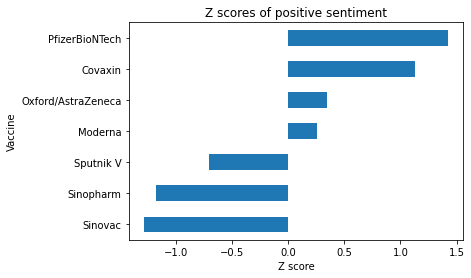

In [ ]:
#z scores of positive sentiment
vax_names = {'Covaxin': covaxin, 'Sputnik V': sputnikv, 'Sinovac': sinovac, 'Sinopharm': sinopharm,
            'Moderna': moderna, 'Oxford/AstraZeneca': oxford, 'PfizerBioNTech': pfizer}
Sentiment_zscores = pd.DataFrame()
for k, v in vax_names.items():
    Senti = v['Sentiment'].value_counts(normalize=True)
    Senti['vaccine'] = k
    Sentiment_zscores = Sentiment_zscores.append(Senti)
for col in ['negative', 'neutral', 'positive']:
    Sentiment_zscores[col+'_zscore'] = (Sentiment_zscores[col] - Sentiment_zscores[col].mean())/Sentiment_zscores[col].std(ddof=0)
Sentiment_zscores.set_index('vaccine', inplace=True)

# Plot the results
ax = Sentiment_zscores.sort_values('positive_zscore')['positive_zscore'].plot.barh(title='Z scores of positive sentiment')
ax.set_ylabel('Vaccine')
ax.set_xlabel('Z score');


In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
    #df_filt = df_filt.drop_duplicates()
    #percentage = vax[vax['Sentiment'] == 'positive']
    #print(str(percentage.shape[0]/(vax.shape[0])*100) + " % of positive tweets")
    timeline = df_filt.groupby(['hashtags', 'Sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='hashtags', y='tweets', color='Sentiment', category_orders={'Sentiment': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

covaxin = filtered_timeline(vax, ['covaxin'], title='Covaxin')
sinovac = filtered_timeline(vax, ['sinovac'], title='Sinovac')
sinopharm = filtered_timeline(vax, ['sinopharm'], title='Sinopharm')
moderna = filtered_timeline(vax, ['moderna'], title='Moderna')
sputnikv = filtered_timeline(vax, ['sputnik'], title='Sputnik V')
oxford = filtered_timeline(vax, ['oxford', 'astrazeneca'], title='Oxford/AstraZeneca')
pfizer = filtered_timeline(vax, ['pfizer', 'biontech'], title='Pfizer/BioNTech')

    

In [ ]:
#word cloud 
!pip install wordninja pyspellchecker
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")
import math
import random

     |████████████████████████████████| 541 kB 7.1 MB/s 
     |████████████████████████████████| 2.7 MB 50.4 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=f1457c6ba29d9abc1c0be154587939da10207128dd027106b8d11e35df956a0d
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# FUNCTIONS REQUIRED

def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

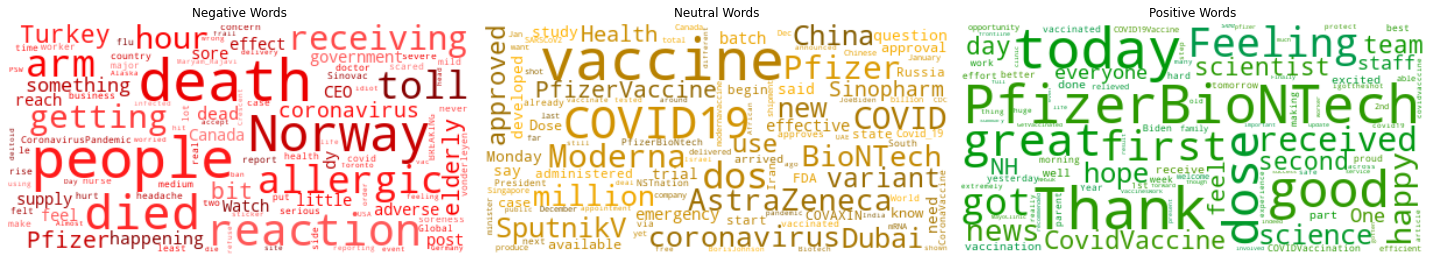

In [ ]:
# Convert string to a list of words
vax['words'] = vax.text.apply(lambda x:re.findall(r'\w+', x ))

def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['Sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['Sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['Sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    
get_smart_clouds(vax)